MySQL Workbench ≠ MySQL Server

MySQL → to store & organize the data.

Python → to analyze, visualize, model, or clean the data.

---

- MySQL Server = the engine (stores and processes data)

- Workbench = the dashboard (a tool to view and manage data)

- Python/Jupyter = the driver (can directly talk to the engine without opening dashboard)

- So even if Workbench is closed, MySQL Server is still running → that’s why Python can connect anytime.

---

we have to Close the  Connection: by after excute queries<br>

cursor.close()<br>
connection.close()


---

| Task               | Use SQL | Use Python              |
| ------------------ | ------- | ----------------------- |
| Create DB/Tables   | ✅       | ✅ (via cursor)          |
| Insert / Fetch     | ✅       | ✅                       |
| Clean Missing Data | ❌       | ✅                       |
| Statistics         | Limited | ✅ (NumPy, pandas)       |
| Visualization      | ❌       | ✅ (Matplotlib, Seaborn) |
| Machine Learning   | ❌       | ✅                       |


Cursor = SQL Operator Inside Python

cursor is what sends your SQL commands to the database and receives the result.
You can think of.

---

### MYSQL–PYTHON METHODS:

| Method                      | Description                                               | Example                                                                                            |
| --------------------------- | --------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| `mysql.connector.connect()` | Establish a connection to the MySQL server                | `conn = mysql.connector.connect(host='localhost', user='root', password='1234', database='sales')` |
| `conn.is_connected()`       | Checks if the connection is active                        | `if conn.is_connected(): print("Connected!")`                                                      |
| `conn.commit()`             | Saves all changes made by `INSERT`, `UPDATE`, or `DELETE` | `conn.commit()`                                                                                    |
| `conn.rollback()`           | Cancels uncommitted changes (used in transactions)        | `conn.rollback()`                                                                                  |
| `conn.close()`              | Closes the connection to MySQL                            | `conn.close()`                                                                                     |


---

### Cursor-Level Methods

| Method                                 | Description                                                 | Example                                                                                         |
| -------------------------------------- | ----------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| `cursor.execute(query, params)`        | Executes a single SQL query                                 | `cursor.execute("SELECT * FROM employees WHERE id = %s", (101,))`                               |
| `cursor.executemany(query, data_list)` | Executes multiple SQL queries at once (bulk insert/update)  | `cursor.executemany("INSERT INTO employees (id,name) VALUES (%s,%s)", [(1,'John'),(2,'Sara')])` |
| `cursor.fetchall()`                    | Fetches **all rows** from the last query result             | `rows = cursor.fetchall()`                                                                      |
| `cursor.fetchone()`                    | Fetches **one row** (useful for loops or single results)    | `row = cursor.fetchone()`                                                                       |
| `cursor.fetchmany(size)`               | Fetches the next `size` number of rows                      | `rows = cursor.fetchmany(5)`                                                                    |
| `cursor.rowcount`                      | Returns number of rows affected by last query               | `print(cursor.rowcount)`                                                                        |
| `cursor.lastrowid`                     | Returns the ID of the last inserted row (if auto-increment) | `print(cursor.lastrowid)`                                                                       |
| `cursor.close()`                       | Closes the cursor                                           | `cursor.close()`                                                                                |


-  Multi-line string : """ """ used to write text/sql quiries  in multiple lines but you have to    assign to a variable
-  doc-string : """ "" used to  write text in multiple lines but no need to assign to a variable

---

connection.commit()


- Purpose: Saves all changes made in the current session (INSERT, UPDATE, DELETE).

- SQL in Python does not auto-save by default.

- If you forget this, changes will not be applied to the database.

---

In [ ]:
#!pip install mysql-connector-python

In [ ]:
#pip install pandas

In [ ]:
#pip install matplotlib

In [135]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Connect to MySQL
connection = mysql.connector.connect(
    host="XXXXXXXX",       # usually 'localhost'
    user="XXXXXXXXXX",            # your MySQL username
    password="XXXXXXXX"  # your MySQL password weak
)
#database="company_db" 

In [137]:
cursor = connection.cursor()
cursor.execute("CREATE DATABASE  joe;")

In [139]:
connection.database = "joe"#selecting particular datbase

In [140]:
create_table_query = """
CREATE TABLE employees (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(50),
    department VARCHAR(50),
    salary FLOAT
);
"""
cursor.execute(create_table_query)


In [141]:
insert_query = """
INSERT INTO employees (name, department, salary)
VALUES (%s, %s, %s);
"""
data = [
    ("Alice", "HR", 45000),
    ("Bob", "IT", 60000),
    ("Charlie", "Finance", 55000),
    ("David", "IT", 70000),
    ("Emma", "HR", 50000)
]

cursor.executemany(insert_query, data)
connection.commit()

In [142]:
query = "SELECT * FROM employees;"
df = pd.read_sql(query, connection)
df


C:\Users\VENKAT RAO\AppData\Local\Temp\ipykernel_2404\870962344.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,id,name,department,salary
0,1,Alice,HR,45000.0
1,2,Bob,IT,60000.0
2,3,Charlie,Finance,55000.0
3,4,David,IT,70000.0
4,5,Emma,HR,50000.0


In [143]:
df.head()

,id,name,department,salary
0,1,Alice,HR,45000.0
1,2,Bob,IT,60000.0
2,3,Charlie,Finance,55000.0
3,4,David,IT,70000.0
4,5,Emma,HR,50000.0


In [144]:
# Summary statistics
df.describe()

,id,salary
count,5.000000,5.000000
mean,3.000000,56000.000000
std,1.581139,9617.692031
min,1.000000,45000.000000
25%,2.000000,50000.000000
50%,3.000000,55000.000000
75%,4.000000,60000.000000
max,5.000000,70000.000000


In [145]:
# Average salary
print(df["salary"].mean())

# Highest salary
print(df["salary"].max())


56000.0
70000.0


In [146]:
# Group by department
dept_avg = df.groupby("department")["salary"].mean()
dept_avg 

department
Finance    55000.0
HR         47500.0
IT         65000.0
Name: salary, dtype: float64

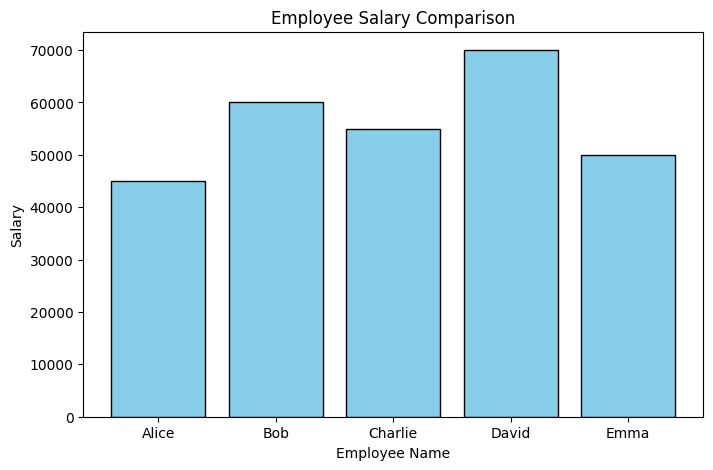

In [147]:
plt.figure(figsize=(8,5))
plt.bar(df['name'], df['salary'], color='skyblue', edgecolor='black')
plt.title("Employee Salary Comparison")
plt.xlabel("Employee Name")
plt.ylabel("Salary")
plt.show()

In [155]:
cursor.close()
connection.close()

| Method / Property   | Purpose                             |
| ------------------- | ----------------------------------- |
| `connection.commit()`          | Save changes (INSERT/UPDATE/DELETE) |
| `connection.rollback()`        | Undo uncommitted changes            |
| `connection.close()`           | Close the connection safely         |
| `connection.is_connected()`    | Check if the connection is active   |
| `connection.get_server_info` | Get MySQL server version            |
| `connection.database`          | Show the current database           |
| `connection.cmd_query()`       | Low-level SQL execution             |


In [149]:
connection.is_connected()

True

In [ ]:
print(connection.close)

In [151]:
connection.server_info

'8.0.43'

In [153]:
connection.database #connection.database → Property, not a method

'joe'

After close the connection:

In [156]:
connection.is_connected()

False

In [157]:
connection.server_info

'8.0.43'

In [159]:
#connection.database           Error : - MySQL server has gone away